# Import Library

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
import warnings
from pickle import dump, load

In [2]:
warnings.filterwarnings('ignore')

# Load Data

In [3]:
df1_model = pd.read_csv("/content/drive/MyDrive/BINAR /for_split.csv")

# Train Test Split

In [4]:
# Buat variabel X and y

y = df1_model['churn_yes']
X = df1_model.drop(columns = ['churn_yes'])

In [5]:
print(type(y)); print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
# Cek jumlah data variabel X train dan test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = .2, random_state = 1
)

print(len(X_train))
print(len(X_test))

3400
850


In [7]:
X_train.head()

,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes
3414,123,141.3,127,24.02,152.0,96,12.92,218.8,114,9.85,8.1,3,2.19,3,0,1
1926,154,64.9,76,11.03,184.1,91,15.65,151.6,75,6.82,14.6,1,3.94,1,0,1
3316,104,174.1,97,29.60,174.6,104,14.84,182.7,158,8.22,9.3,4,2.51,3,0,0
3642,126,193.1,114,32.83,75.5,61,6.42,186.2,73,8.38,11.1,1,3.00,3,0,0
3613,155,176.1,88,29.94,244.5,84,20.78,189.9,99,8.55,11.2,1,3.02,2,1,0


In [8]:
# Scaler total_day_minutes, total_day_charge, total_eve_minutes,
# total_eve_charge, total_night_minutes, total_night_charge, total_intl_minutes
# dan total_intl_charge

num_cols = ['total_day_minutes', 'total_day_charge', 'total_eve_minutes',
            'total_eve_charge', 'total_night_minutes', 'total_night_charge',
            'total_intl_minutes', 'total_intl_charge']
scaler = MinMaxScaler()
# scaler.fit(X_train[num_cols])

In [9]:
# scaled

X_train_scaled = pd.DataFrame(scaler.fit_transform(df1_model[num_cols]), columns = num_cols)
X_train[num_cols] = X_train_scaled

In [10]:
X_train.head()

,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes
3414,123,0.401991,127,0.401941,0.423045,96,0.423052,0.553924,114,0.554305,0.405,3,0.405556,3,0,1
1926,154,0.184637,76,0.184572,0.512385,91,0.512443,0.383797,75,0.383793,0.730,1,0.729630,1,0,1
3316,104,0.495306,97,0.495315,0.485945,104,0.485920,0.462532,158,0.462577,0.465,4,0.464815,3,0,0
3642,126,0.549360,114,0.549364,0.210131,61,0.210216,0.471392,73,0.471581,0.555,1,0.555556,3,0,0
3613,155,0.500996,88,0.501004,0.680490,84,0.680419,0.480759,99,0.481148,0.560,1,0.559259,2,1,0


In [11]:
# Simpan hasil

dump(scaler, open('scaler.pkl', 'wb'))
df1_model.to_csv("clean_data.csv", index = False)

# Hyperparameter Tuning





In [12]:
# Tentukan hyperparameter yang akan ditunning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Buat objek GridSearchCV
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1)

# Latih model dengan data latih
grid_search.fit(X_train, y_train)

# Periksa hasilnya
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.7557894736842106


In [13]:
models = [RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=1)]


RandomForestClassifier
Confusion Matrix


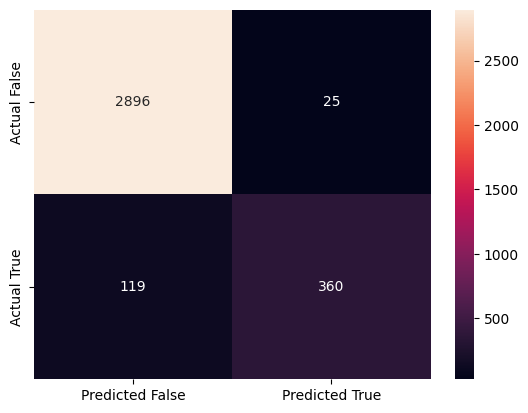

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2921
           1       0.94      0.75      0.83       479

    accuracy                           0.96      3400
   macro avg       0.95      0.87      0.90      3400
weighted avg       0.96      0.96      0.96      3400



In [14]:
for clf in models:
  y_pred = cross_val_predict(clf, X_train, y_train, cv=5)
  print(type(clf).__name__)
  cm = confusion_matrix(y_train, y_pred)
  print('Confusion Matrix')
  sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted False', 'Predicted True'], yticklabels=['Actual False', 'Actual True'])
  plt.show()
  print('Classification Report')
  print(classification_report(y_train, y_pred))

In [15]:
# Mengambil nilai recall train Random Forest Tunning
recall_scores = {}

for clf in models:
    recall = cross_val_score(clf, X_train, y_train, cv=5, scoring=make_scorer(recall_score)).mean()
    recall_scores[type(clf).__name__] = recall

In [ ]:
recall_scores

# Test Overfitting

In [ ]:
X_test = X_test.reset_index(drop = True)
X_test.head()

In [18]:
# load back scaler

scaler = load(open('/content/drive/MyDrive/BINAR /scaler.pkl', 'rb'))

scaler_features = scaler.get_feature_names_out()
scaler_features

array(['total_day_minutes', 'total_day_charge', 'total_eve_minutes',
       'total_eve_charge', 'total_night_minutes', 'total_night_charge',
       'total_intl_minutes', 'total_intl_charge'], dtype=object)

In [19]:
X_test_scaled = X_test[scaler_features]
X_test_scaled = pd.DataFrame(scaler.transform(X_test_scaled), columns = scaler_features)

# Replace nilai asli dengan scaled

X_test[scaler_features] = X_test_scaled
X_test.head()

,account_length,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_yes,voice_mail_plan_yes
0,65,0.637838,106,0.637718,0.527693,100,0.527832,0.564051,75,0.564434,0.490,4,0.490741,0,0,1
1,82,0.438122,107,0.438086,0.262733,114,0.262606,0.728101,95,0.728194,0.505,7,0.505556,1,0,0
2,114,0.586629,79,0.586513,0.723629,91,0.723641,0.738228,83,0.738323,0.570,6,0.570370,1,0,1
3,38,0.627312,110,0.627343,0.503201,114,0.503274,0.396203,102,0.396173,0.280,7,0.279630,1,0,0
4,48,0.563869,108,0.563755,0.503757,70,0.503929,0.604810,86,0.604952,0.605,2,0.605556,1,0,0


RandomForestClassifier
Confusion Matrix


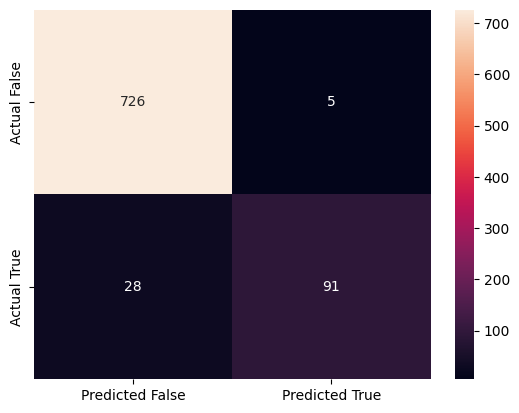

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       731
           1       0.95      0.76      0.85       119

    accuracy                           0.96       850
   macro avg       0.96      0.88      0.91       850
weighted avg       0.96      0.96      0.96       850



In [20]:
for clf in models:
  clf.fit(X_train, y_train)
  y_pred_test = clf.predict(X_test)
  print(type(clf).__name__)
  cm2 = confusion_matrix(y_test, y_pred_test)
  print('Confusion Matrix')
  sns.heatmap(cm2, annot=True, fmt='d', xticklabels=['Predicted False', 'Predicted True'], yticklabels=['Actual False', 'Actual True'])
  plt.show()
  print('Classification Report')
  print(classification_report(y_test, y_pred_test))

In [21]:
# Mengambil nilai recall test Random Forest tunning
recall_scores_test = {}

for clf in models:
    y_pred_test = clf.predict(X_test)
    recall = recall_score(y_test, y_pred_test)
    recall_scores_test[type(clf).__name__] = recall

In [22]:
recall_scores

{'RandomForestClassifier': 0.7516228070175439}

In [23]:
recall_scores_test

{'RandomForestClassifier': 0.7647058823529411}

{'RandomForestClassifier': 0.7647058823529411}